# Backtracking 알고리즘
* 문제의 해를 탐색하는 방식
* 해를 찾는 과정에서 해를 더 이상 얻지 못하면 바로 직전 상태로 되돌아가서 다른 것을 시도하며 해를 찾는다.
* 최적화 문제와 결정 문제를 해결
* 결정 문제 : 문제에 대한 해의 존재 여부
* 해 탐색 순서 : 깊이 우선(Depth First)
* 깊이 우선 탐색의 보완 : 분기 한정 (Branch and Bound)알고리즘


## 그래프 색칠하기
* 인접한 영역을 서로 다른 색으로 칠하는 지도 색칠하기
* 그래프의 인접한 노드를 서로 다르게 색칠하는 그래프 색칠하기
* 지도는 항상 그래프로 변환할 수 있다.  
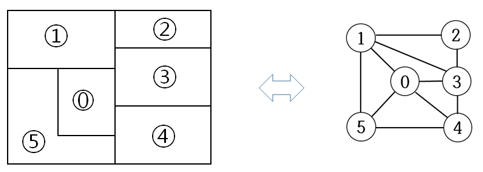

### 최소의 색으로 그래프 칠하기
* 4개 이상의 색을 사용하면 당연히 가능!
* 위의 그래프를 2개의 색으로 칠하려면 인접한 두 정점이 같은 색을 가질 수 밖에 없음
* 위 그래프는 3개의 색으로도 가능하다.  
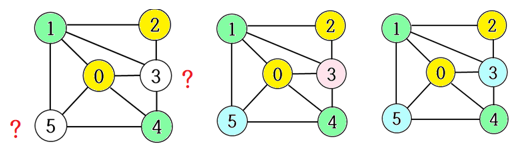

### Chromatic number(채색수)찾기
* 모든 조합을 다 시도한다면? 너무 시간이 많이 걸림
* 그리디 알고리즘?
> 그리디 색칠하기(Greedy Coloring): 이웃한 정점의 색에 사용되지 않은 색 중에 가장 작은 색을 칠하기  
그리디 색칠하기는 선형 시간에 색칠이 가능하나, 채색수보다 많은 색을 사용할 수도 있으므로 최적해를 보장하지 않는다.
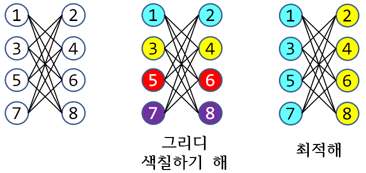

### 백트래킹 이용
* 정점 0부터 하나의 색을 선택하고,
* 1이 0과 인접하면 다른 색을 선택하는 방식으로 각 노드에 대해 빠짐없이 차례로 색을 선택  
* State space tree (상태 공간 트리)  
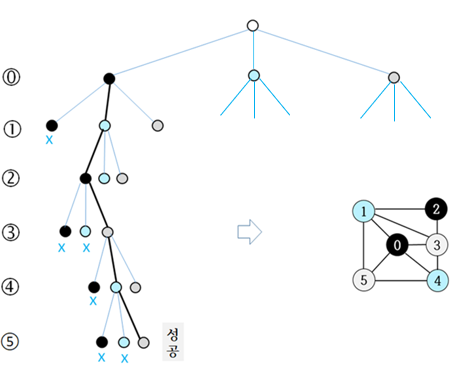

* 'x' 표시: 인접한 노드의 색과 같아서 실패한 경우  
* 실패하면 부모 노드로 돌아가서 다른 색을 선택  
* 트리의 루트는 초기 상태를 나타내며, 각 레벨마다 정점을 차례로 할당하여 정점을 색칠해보며 색칠할 수 없으면 다음 색을 시도
* [주의] 상태 공간 트리를 실제로 만들지 않는다.


### 색칠하기 백트래킹 알고리즘
* K색을 사용하여, 정점이 n개인 그래프 색칠하기


1. 정점 0을 하나의 색을 칠한다.
2. 모든 점들이 색칠될 때까지
> 다음 점이 이미 색칠된 점과 인접하면, 인접한 점의 색과 다른 색을 선택한다.


* 단, 주어진 K에 대해 색칠을 실패하면 K를 1 증가시킨 후, 처음부터 다시 알고리즘을 수행한다.


In [7]:
#입력 그래프의 인접 행렬 만들기
g = [[0,1,0,1,1,1],
     [1,0,1,1,0,1],
     [0,1,0,1,0,0],
     [1,1,1,0,1,0],
     [1,0,0,1,0,1],
     [1,1,0,0,1,0]]
n = len(g)
K = 3
color = [-1 for i in range(n)]  #각 정점의 색을 -1로 초기화


In [12]:
#알고리즘 구현하기
def valid(i):
    for j in range(n):
        if g[i][j] and color[i] == color[j] and (color[i] != -1):
            return False
    return True

def coloring(i):
    if i== n:
        print('색칠결과:', color)
        return True

    for c in range(K):
        color[i]= c
        if valid(i):
            if coloring(i+1):
                return True
    return False



In [13]:
#실행해 보기

if not coloring(0):
    print('색칠 할 수 없음')


색칠결과: [0, 1, 0, 2, 1, 2]


### 수행시간
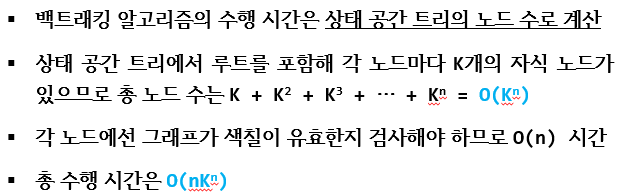

### 다항식 시간에 색칠 가능한 그래프
* 노드 수가 많고 필요한 색의 수가 많아질수록 상태 공간 트리의 노드 수는 기하급수적으로 늘어난다.
* 일반적인 그래프에 대해 색칠하기 문제를 해결하는 다항식 시간 알고리즘은 발견되지 않음
* 다항식 시간에 색칠 가능한 특수한 그래프
> * 평면 그래프(Plane Graph) - 지도를 변환한 그래프가 평면 그래프
    - 평면 그래프의 특징은 어떤 간선도 서로 교차하지 않도록 그래프를 그릴 수 있다.
  * 구간 그래프(Interval Graph) : Part 4.1의 구간 분할 문제에서 동아리가 정점이고 두 동아리의 미팅 시간이 겹치면 해당 정점들 사이에 간선을 그려서 만든 그래프가 구간 그래프  
   - 미팅룸 수 = 구간 그래프의 채색수  
   - 같은 색의 정점(동아리)들은 동일한 미팅룸에 배정
   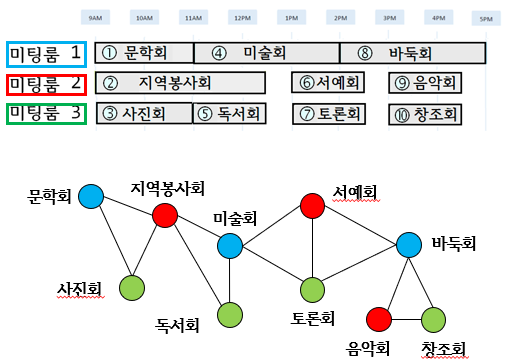


### [과제1] 구간 분할 문제
미팅룸 수를 구하는 구간 분할 문제를 Backtracking알고리즘으로 해결해 보자.

In [ ]:
#미팅룸 수를 구하는 구간 분할 문제를 Backtracking알고리즘으로 해결해 보자.





## 여왕 말 문제 (n-Queens Problem)
Q가 같은 열, 같은 행, 같은 대각선상에 서로 놓이지 않도록 n⨯n 장기판에 n개의 Q를 배치하는 문제. 단, n > 3

[예] 첫 번째 Q이 (0,0)에 있을 때, 다른 퀸들을 배치해 보자. (직접 종이에 그려보세요!)  
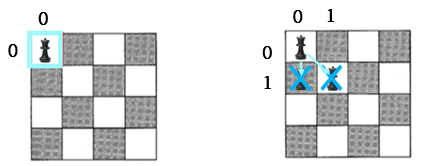

#### 상태 공간 트리
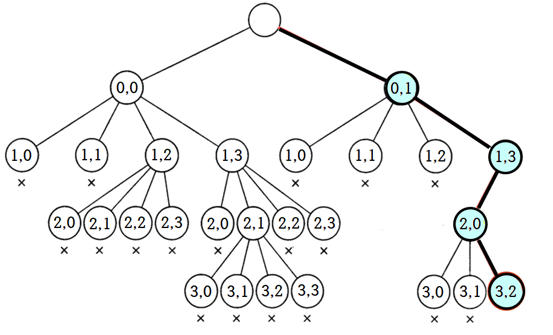

#### 여왕 말 백트래킹

[1] Q를 (0, 0)부터 놓기 시작하여 다음 Q를 서로 위협하지 않도록 배치한다.

[2] 만일 배치할 수 없으면, 직전 Q의 위치를 다음 칸으로 이동하여 다시 시도한다. 다음 칸이 없는 경우에는 위층의 Q를 다음 칸으로 이동하여 시도한다.


In [16]:
#입력 값 처리 및 보드 초기화
print('여왕 말의 수 : ', end='')
n = int(input())
board = [[0 for _ in range(n)] for _ in range(n)] #nxn 보드초기화

여왕 말의 수 : 

In [24]:
#알고리즘 구현하기

def is_threatening(i,j):
    for k in range(n):
        if board[i][k] == 1 or board[k][j] ==1:
            return True
        
    for k in range(n):
        for l in range(n):
            if(k+l == i+j) or (k-l ==i-j):
                if board[k][l]==1:
                    return True
    return False

def queen(i):
    if i == n:
        return True
    for j in range(n):
        if(not(is_threatening(i, j)))and (board[i][j] != 1):
            board[i][j] = 1
            if queen(i+1):
                return True
            board[i][j] = 0
    return False


In [26]:
#실행해 보기

queen(0)
for x in board:
    print(*x, sep=" ")

0 1 0 0
0 0 0 1
1 0 0 0
0 0 1 0


#### 수행시간
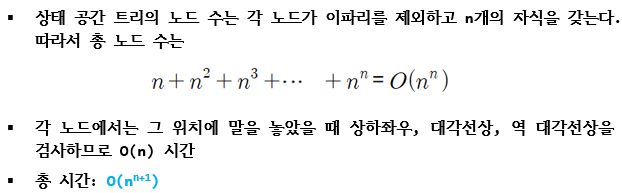

### [과제2] N-Queen Problem
 
* https://www.acmicpc.net/problem/9663


In [ ]:
#풀어보기

## 합이 K되는 숫자 백트래킹
 * 모든 조합을 검사하는 것과 근본적으로 같은 방법
 * 체계적으로 해를 찾으면서 해가 될 수 없는 조합을 건너뛸 수 있다.

### 알고리즘

[1] 주어진 숫자들을 증가 순으로 정렬한다.  
[2] 순서대로 숫자를 선택하는 경우(o)와 포기하는 경우(x)로 나누어 상태 공간 트리의 노드를 만든다. 만일 노드를 만들 수 없거나 만들 필요가 없으면 부모 노드로 되돌아가서 다른 노드를 선택한다.  
[3] 위에서 만든(선택한) 노드에서 해를 찾으면 알고리즘 종료하고, 해가 아니면 [2]를 수행한다.


#### 가지치기 (punning)
* 입력을 정렬하는 이유: 자식 노드를 만들 때 다음 숫자를 추가한 합이 K를 초과하면 그 이후의 숫자는 다음 숫자보다 크므로 만들어진 노드로부터 아래로 더 이상 탐색해도 해가 없으므로
* 탐색 중단: 가지치기(punning)
* 또한 탐색 중 남은 숫자들을 다 더해도 K보다 작은 경우에도 가지치기를 수행

[예제] {15, 20, 55, 75}, K = 95

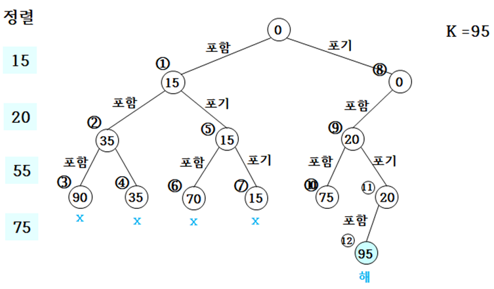


In [29]:
#입력 값 처리하기
S = [3,4,5,6]
K = 13
n = len(S)
include = [None for _ in range(n)]  #숫자가 포함되면 True로 변경

In [30]:
#알고리즘 구현하기

def promising(i, current_sum, leftover):
    if i == -1:
        return True
    else:
        return (current_sum + leftover >=K)and \
        (current_sum == K or current_sum + S[i+1] <= K)
    

def find_set(i, current_sum, leftover):
    if promising(i, current_sum, leftover):
        if current_sum == K:
            return True
        else:
            include[i+1] = True
            if find_set(i+1, current_sum + S[i+1], leftover - S[i+1]):
                return True
            
            include[i+1] = False
            if find_set(i+1, current_sum, leftover - S[i+1]):
                return True
    return False


In [32]:
#실행해 보기

if find_set(-1, 0, sum(S)):
    print([S[j] for j in range(n) if include[j]])
else:
    print('답 없음')

[3, 4, 6]


### 수행 시간
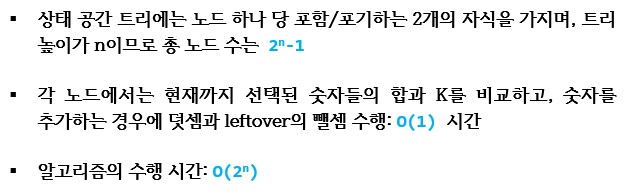

### [과제3] 예산 관리
* https://codeup.kr/problem.php?id=3510